# Classifying Mushrooms - Machine Learning & Neural Networks End of Term Assignment

This coursework aims to implement the universal workflow from Francois Chollet's Deep Learning with Python and apply it to classify mushrooms as either edible or not edible.

We are using the [Mushroom Dataset](https://archive.ics.uci.edu/ml/datasets/mushroom) [1] from UCI’s Machine Learning Repository to implement our model.

The overall workflow will reflect the literature [2].

**The Universial Machine Learning Workflow**


1. Define the problem and assemble a dataset
2. Choose a measure of success
3. Decide on an evaluation protocol
4. Prepare the data
5. Develop a model that does better than a baseline
6. Develop a model that overfits
7. Regularize the model and tune its hyperparameters 

# 1. Define the problem and assemble a dataset

Our hypothetical problem is the classification of mushrooms as edible or non-edible, with the purpose of selecting mushrooms for use in human food production. Since mushrooms can be poisonous, the goal is to prevent humans from getting sick by eating poisonous mushrooms.

Let's frame the problem in more detail. Our input data is the aforementioned dataset, which is a multivariate set of data about mushrooms and 22 features about the sample mushrooms. Based on these features, we are trying to predict if the mushrooms are suitable for human consumption.

The task at hand is binary classification - we determine if a mushroom edible or not.

Using the data information file, we can load up a list of features for our data.

Feature Information:

- classes:
  - edible=e, poisonous=p
  
- cap-shape:
  - bell=b ,conical=c ,convex=x, flat=f, knobbed=k, sunken=s
  
- cap-surface:
  - fibrous=f, grooves=g, scaly=y, smooth=s
  
- cap-color:
  - brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
  
- bruises?:
  - bruises=t, no=f
  
- odor:
  - almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
  
- gill-attachment:
  - attached=a, descending=d, free=f, notched=n
  
- gill-spacing:
  - close=c, crowded=w, distant=d
  
- gill-size:
  - broad=b, narrow=n
  
- gill-color:
  - black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
  
- stalk-shape:
  - enlarging=e, tapering=t
  
- stalk-root:
  - bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
  
- stalk-surface-above-ring:
  - fibrous=f, scaly=y, silky=k, smooth=s
  
- stalk-surface-below-ring:
  - fibrous=f, scaly=y, silky=k, smooth=s
  
- stalk-color-above-ring:
  - brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
  
- stalk-color-below-ring:
  - brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
  
- veil-type:
  - partial=p, universal=u
  
- veil-color:
  - brown=n, orange=o, white=w, yellow=y
  
- ring-number:
  - none=n, one=o, two=t
  
- ring-type:
  - cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
  
- spore-print-color:
  - black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
  
- population:
  - abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
  
- habitat:
  - grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

From these features we can create a list of column names for our dataset




In [1]:
column_names = ['class',
                'cap-shape',
                'cap-surface',
                'cap-color',
                'bruises?',
                'odor',
                'gill-attachment',
                'gill-spacing',
                'gill-size',
                'gill-color',
                'stalk-shape',
                'stalk-root',
                'stalk-surface-above-ring',
                'stalk-surface-below-ring',
                'stalk-color-above-ring',
                'stalk-color-below-ring',
                'veil-type',
                'veil-color',
                'ring-number',
                'ring-type',
                'spore-print-color',
                'population',
                'habitat']

Lets import our dataset and create a Pandas DataFrame from the `.data` file 

In [2]:
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'

mushrooms = pd.read_csv(url, header=None, names=column_names)

mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g




---



# 2. Choose a measure of success

Since our problem involves the prevention of human sickness or death, we will use precision as a measure of success. Precision is the ability of the classifier not to label mushrooms which are poisonous as edible. This places a preference for correct predictions of poisonous mushrooms, as we prefer if edible mushrooms are misidentified as poisonous rather than poisonous mushrooms being misidentified as edible.

$Precision = \frac{True Positives}{True Positives + False Positive}$

In [3]:
from sklearn.metrics import precision_score



---



# 3. Decide on an evaluation protocol

I'll apply 10-fold cross validation to evaluate our model. While a simple holdout validation set might be enough, our dataset of 8.000 samples might not be enough.

In [4]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

First lets split our data into a feature matrix `(X)`, and a target vector`(y)`. We will use `OneHotEncoder` to encode our catagorical variables.

In [5]:
import category_encoders as ce

X = mushrooms.drop(columns='class')
X = ce.OneHotEncoder(use_cat_names=True).fit_transform(X)
y = mushrooms['class'].replace({'p':0, 'e':1})

print('Feature matrix size:',X.shape)
print('Target vector size:',len(y))

Feature matrix size: (8124, 117)
Target vector size: 8124


Next we will split our data into a training set and a test set.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                    test_size=.2,
                                                    stratify=y)

print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (6499, 117)
Training target vector size: (6499,)
Test feature matrix size: (1625, 117)
Test target vector size: (1625,)




---



# 4. Prepare the data

Before we begin training our model, we shall explore the data and note some important characteristics, and potentially fix any issues.

We could use `.dtypes()`, `.columns`, and `.shape` to examine our dataset, but Pandas provides a `.info` function that will allow us to view all this information in one place.

In [7]:
print(mushrooms.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises?                  8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Another useful step is to check is the number of null values and where they are in the DataFrame.

In [8]:
print(mushrooms.isna().sum())

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises?                    0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


It is unlikely that this dataset actually has no null values at all. We should check if there are placeholder values, often denoted with question marks.

In [9]:
import numpy as np
mushrooms = mushrooms.replace({'?':np.NaN})

In [10]:
print(mushrooms.isna().sum())

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises?                       0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64


As we can see, `stalk_root` has 2480 blank features. We can replace these with `n` for none.

In [11]:
mushrooms['stalk-root'] = mushrooms['stalk-root'].replace(np.NaN,'n')

In [12]:
print(mushrooms['stalk-root'].value_counts())

b    3776
n    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64


# 5. Develop a model that does better than a baseline

## Baseline Model

Using the most common label from our dataset we will create a baseline model that we hope to beat. First lets look at how class is distributed.

In [13]:
mushrooms['class'].value_counts(normalize=True)

e    0.517971
p    0.482029
Name: class, dtype: float64

We will use the mode of the class attribute to create our baseline prediction.

In [14]:
majority_class = y_train.mode()[0]

baseline_predictions = [majority_class] * len(y_train)

Let's see how accurate our baseline model is.

In [15]:
from sklearn.metrics import accuracy_score

majority_class_accuracy = accuracy_score(baseline_predictions,
                                         y_train)

majority_class_accuracy

0.5179258347438067

The accuracy is around 52%, which is expected given the nature of our dataset.



---



## Decision Tree

We will attempt to fit a decision stump to our training data and produce an accuracy score greater than 52%.

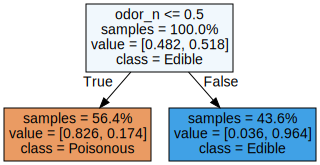

In [16]:
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz

tree = DecisionTreeClassifier(max_depth=1)

tree.fit(X_train, y_train)

dot_data = export_graphviz(tree, out_file=None, feature_names=X_train.columns, 
                           class_names=['Poisonous', 'Edible'], filled=True, impurity=False, proportion=True)

graphviz.Source(dot_data)

Let's look at the prediction probability distribution for our model. In simple terms this represents how sure the model is about its classification label. `sklearn` provides us with a simple way to see many of the ralevant scores for classification models with `classification_report`. We can also generate a confusion matrix using sklearn's `confusion_matrix`.



In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix


def model_analysis(model, train_X, train_y, model_name):
  model_probabilities = model.predict_proba(train_X)

  Model_Prediction_Probability = []

  for _ in range(len(train_X)):
    x = max(model_probabilities[_])
    Model_Prediction_Probability.append(x)

  plt.figure(figsize=(15,10))  
  sns.displot(Model_Prediction_Probability, kde=True)
  plt.title(model_name+'Prediction Probabilities')
  # Set x and y ticks
  plt.xticks(color='gray')
  #plt.xlim(.5,1)
  plt.yticks(color='gray')

  # Create axes object with plt. get current axes
  ax = plt.gca()

  # Set grid lines
  ax.grid(visible=True, which='major', axis='y', color='black', alpha=.2)

  # Set facecolor
  ax.set_facecolor('white')

  # Remove box
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.tick_params(color='white')
  plt.show();
  
  model_predictions = model.predict(train_X)
  
  print('\n\n', classification_report(train_y, model_predictions,
                            target_names=['0-Poisonous', '1-Edible']))
  
  con_matrix = pd.DataFrame(confusion_matrix(train_y, model_predictions),
                                        columns=['Predicted Poison', 'Predicted Edible'], 
                                        index=['Actual Poison', 'Actual Edible'])
  
  plt.figure(figsize=(15,10))
  sns.heatmap(data=con_matrix, cmap='cool');
  plt.title(model_name + 'Confusion Matrix')
  plt.show();
  
  #print('\n\n', con_matrix)
  return con_matrix

<Figure size 1080x720 with 0 Axes>

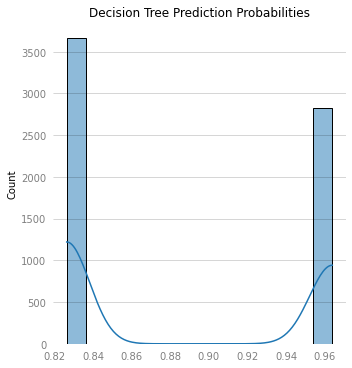



               precision    recall  f1-score   support

 0-Poisonous       0.83      0.97      0.89      3133
    1-Edible       0.96      0.81      0.88      3366

    accuracy                           0.89      6499
   macro avg       0.90      0.89      0.89      6499
weighted avg       0.90      0.89      0.89      6499



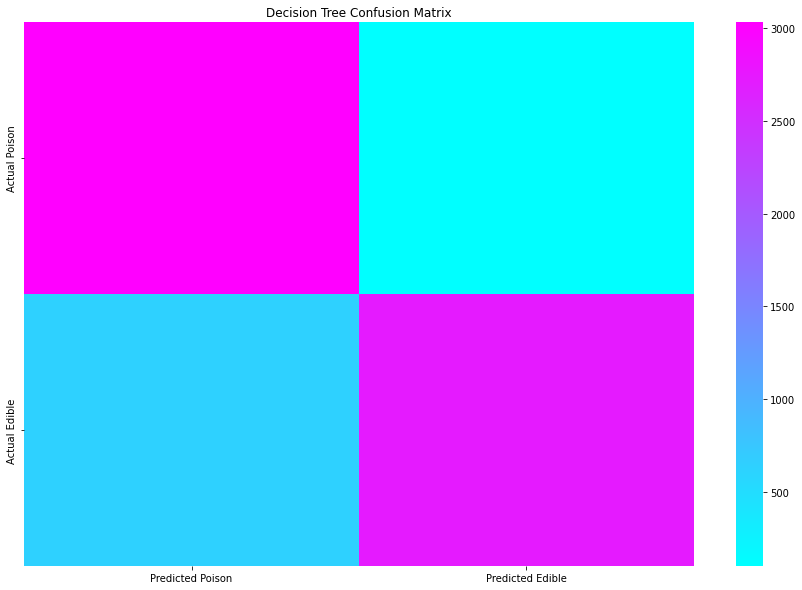

,Predicted Poison,Predicted Edible
Actual Poison,3031,102
Actual Edible,637,2729


In [18]:
model_analysis(tree, X_train, y_train, 'Decision Tree ')

We will store our predictions as a `tree_predictions` variable for use in interpreting the models accuracy.

In [19]:
tree_predictions = tree.predict(X_train)

In [20]:
accuracy_score(y_train, tree_predictions)

0.8862901984920757



---



# 6. Develop a model that overfits

We will use the `RandomForestClassifier` for our overfitting model.

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

random_forest = RandomForestClassifier(n_estimators=100, max_depth=5)

In [22]:
cv = cross_validate(estimator = random_forest,
                    X = X_train,
                    y = y_train,
                    scoring='accuracy',
                    n_jobs=-1,
                    cv=10,
                    verbose=5,
                    return_train_score=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.


[CV] END ..................., score=(train=0.990, test=0.986) total time=   0.2s
[CV] END ..................., score=(train=0.993, test=0.992) total time=   0.2s
[CV] END ..................., score=(train=0.991, test=0.995) total time=   0.2s
[CV] END ..................., score=(train=0.990, test=0.994) total time=   0.2s
[CV] END ..................., score=(train=0.990, test=0.986) total time=   0.2s
[CV] END ..................., score=(train=0.990, test=0.991) total time=   0.2s
[CV] END ..................., score=(train=0.989, test=0.997) total time=   0.2s
[CV] END ..................., score=(train=0.990, test=0.992) total time=   0.2s
[CV] END ..................., score=(train=0.991, test=0.985) total time=   0.2s
[CV] END ..................., score=(train=0.991, test=0.985) total time=   0.2s


[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.8s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.9s finished


In [23]:
cv_df = pd.DataFrame(cv)
cv_df

,fit_time,score_time,test_score,train_score
0,0.160542,0.011479,0.986154,0.990426
1,0.162347,0.006062,0.986154,0.990426
2,0.158364,0.006197,0.992308,0.993161
3,0.169151,0.016858,0.990769,0.989913
4,0.173562,0.006016,0.993846,0.990255
5,0.149473,0.006624,0.995385,0.990939
6,0.172313,0.006033,0.992308,0.989742
7,0.171101,0.006212,0.996923,0.989229
8,0.172027,0.006203,0.984615,0.990597
9,0.171147,0.005821,0.984592,0.990940


In [24]:
random_forest.fit(X_test, y_test)
test_predictions = random_forest.predict(X_train)

accuracy_score(y_train, test_predictions)

0.9890752423449761

A very high accuracy score such as 99% is a sign of overfitting. We will write a function to preform all of our classification analysis from earlier.

<Figure size 1080x720 with 0 Axes>

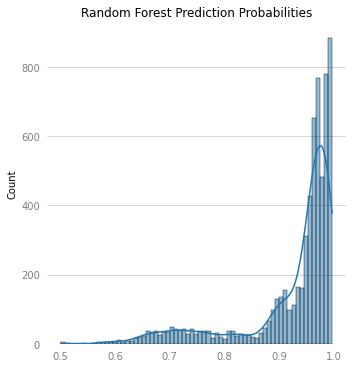



               precision    recall  f1-score   support

 0-Poisonous       1.00      0.98      0.99      3133
    1-Edible       0.98      1.00      0.99      3366

    accuracy                           0.99      6499
   macro avg       0.99      0.99      0.99      6499
weighted avg       0.99      0.99      0.99      6499



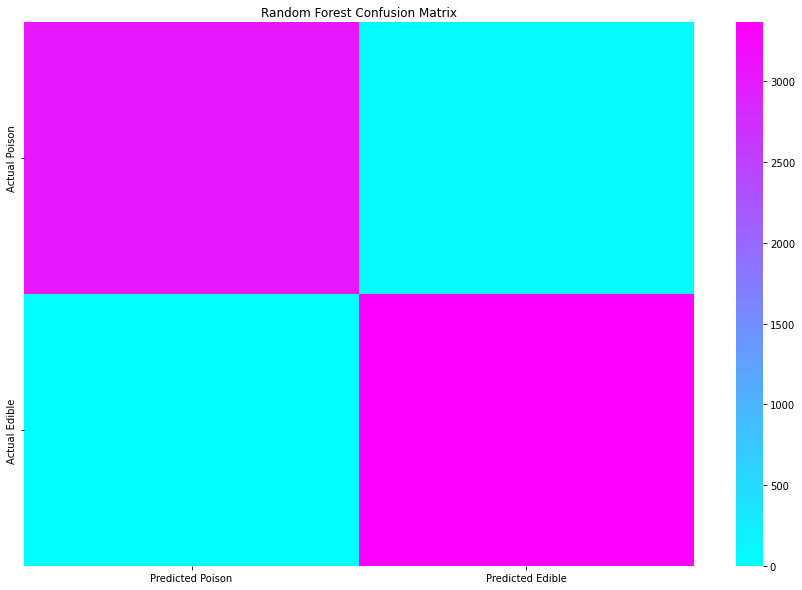

,Predicted Poison,Predicted Edible
Actual Poison,3062,71
Actual Edible,0,3366


In [25]:
model_analysis(random_forest, X_train, y_train, 'Random Forest ')



---



# 7. Regularize the model and tune its hyperparameters 

Now we will tune the hyperparameters of our `RandomForestClassifier` and attempt to walk the line between underfitting and overfitting.

In [26]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'max_depth':[1, 2, 3, 4, 5],
    'n_estimators': [10, 25, 50, 100, 150, 200]
}

search = RandomizedSearchCV(estimator = RandomForestClassifier(),
                            param_distributions = param_distributions,
                            n_iter=30,
                            scoring='precision',
                            n_jobs=-1,
                            cv=10,
                            verbose=1,
                            return_train_score=True)
 
search.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'n_estimators': [10, 25, 50, 100, 150,
                                                         200]},
                   return_train_score=True, scoring='precision', verbose=1)

We can use `search.best_estimator_` to see which model has the highest precision score.

In [27]:
best_model = search.best_estimator_
best_model

RandomForestClassifier(max_depth=5, n_estimators=50)

From the model description we can see that a RandomForestClassifier with a max_depth of 5 and 25 estimators is our optimal model. Now we can run our analysis function.

In [28]:
search.best_score_

0.9836836764257519

<Figure size 1080x720 with 0 Axes>

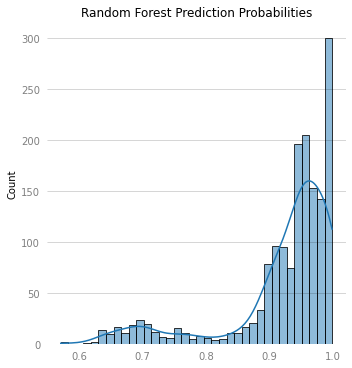



               precision    recall  f1-score   support

 0-Poisonous       1.00      0.98      0.99       783
    1-Edible       0.98      1.00      0.99       842

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



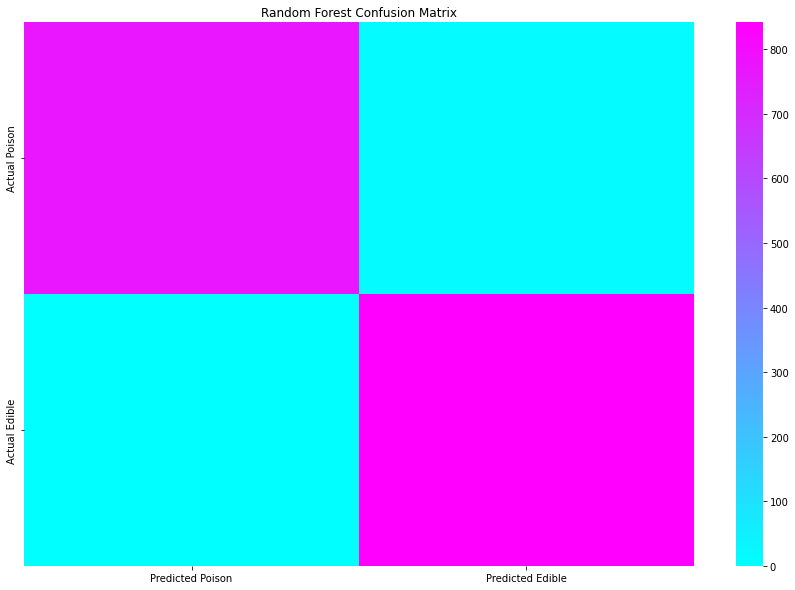

,Predicted Poison,Predicted Edible
Actual Poison,768,15
Actual Edible,0,842


In [29]:
model_analysis(best_model, X_test, y_test, 'Random Forest ')

The final model produced 6 false positives, which isn't perfect but quite close to a good model. In conclusion, we can state that we have found a model based on random forest generation that accurately predicts if mushrooms are edible or not 98% of the time.

# References

[1] Chollet, Francois. [Deep Learning with Python](https://www.amazon.com/Deep-Learning-Python-Francois-Chollet/dp/1617294438). Manning Publications, 2017.

[2] University of California, Irvine. [Mushroom Data Set](https://archive.ics.uci.edu/ml/datasets/mushroom). UCI, 1987.